In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


### Importing Data

In [2]:
train= pd.read_parquet(r"C:\Users\user\OneDrive\Documents\Python\train.parquet")
train

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0


In [3]:
test=pd.read_parquet(r"C:\Users\user\OneDrive\Documents\Python\test.parquet")
test

,ID,Date,X1,X2,X3,X4,X5
0,0,2020-12-16,1.685395,5.463917,1.0,7.389056,2.890372
1,1,2020-12-16,1.488844,5.454936,1.0,7.389056,2.890372
2,2,2020-12-16,1.164160,5.471136,1.0,1.000000,2.890372
3,3,2020-12-16,1.000000,5.467385,1.0,1.000000,2.890372
4,4,2020-12-16,1.000000,5.453995,1.0,1.000000,2.833213
...,...,...,...,...,...,...,...
409851,409851,2024-11-26,1.120752,5.483053,1.0,2.718282,0.000000
409852,409852,2024-11-26,1.096365,5.477802,1.0,7.389056,0.000000
409853,409853,2024-11-26,1.111822,5.479972,1.0,2.718282,0.000000
409854,409854,2024-11-26,1.000000,5.486165,1.0,1.000000,0.000000


### Data Exploration and Preprocessing

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1639424 non-null  datetime64[ns]
 1   X1      1639424 non-null  float64       
 2   X2      1639424 non-null  float64       
 3   X3      1639424 non-null  float64       
 4   X4      1639424 non-null  float64       
 5   X5      1639424 non-null  float64       
 6   target  1639424 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 87.6+ MB


In [5]:
train.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99])

,Date,X1,X2,X3,X4,X5
count,1639424,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06
mean,2022-12-03 07:23:43.817145600,1.139258e+00,5.488189e+00,4.110388e+32,2.706323e+29,1.187219e+00
min,2020-12-16 00:00:00,1.000000e+00,5.412539e+00,1.000000e+00,1.000000e+00,0.000000e+00
1%,2020-12-30 00:00:00,1.000000e+00,5.451639e+00,1.000000e+00,1.000000e+00,0.000000e+00
10%,2021-05-10 00:00:00,1.000000e+00,5.470925e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2021-12-10 00:00:00,1.049171e+00,5.480597e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2022-11-30 00:00:00,1.105171e+00,5.488979e+00,1.000000e+00,1.000000e+00,6.931472e-01
75%,2023-11-23 00:00:00,1.214096e+00,5.496717e+00,1.000000e+00,2.718282e+00,2.890372e+00
99%,2024-11-23 00:00:00,1.612845e+00,5.518537e+00,3.185593e+16,4.311232e+15,3.044522e+00
max,2024-12-11 00:00:00,4.014850e+00,5.541852e+00,1.651636e+38,5.540622e+34,3.465736e+00


In [6]:
train.isna().sum()   #no null values

Date      0
X1        0
X2        0
X3        0
X4        0
X5        0
target    0
dtype: int64

In [7]:
train.Date.min()

Timestamp('2020-12-16 00:00:00')

In [8]:
train.Date.max()

Timestamp('2024-12-11 00:00:00')

In [9]:
train.target.value_counts()/train.target.value_counts().sum()

target
0    0.991437
1    0.008563
Name: count, dtype: float64

In [10]:
#splitting X & y variables
X=train[train.columns.difference(['target'])]
y=train['target'].astype('int')

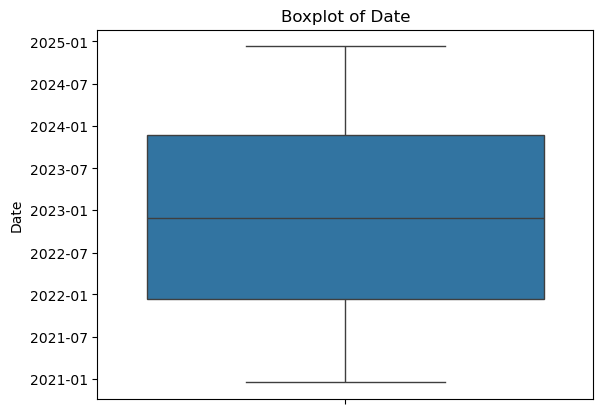

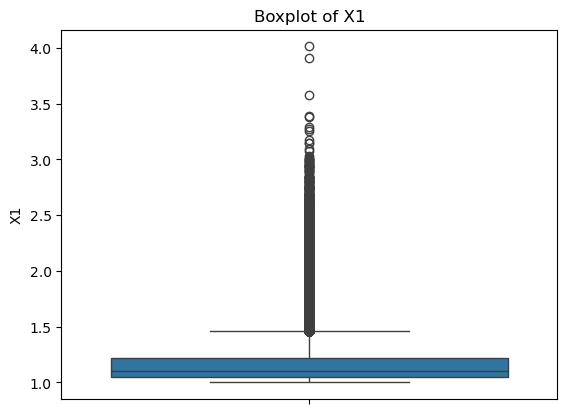

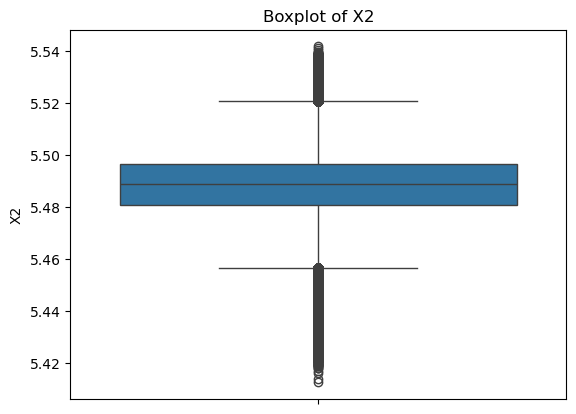

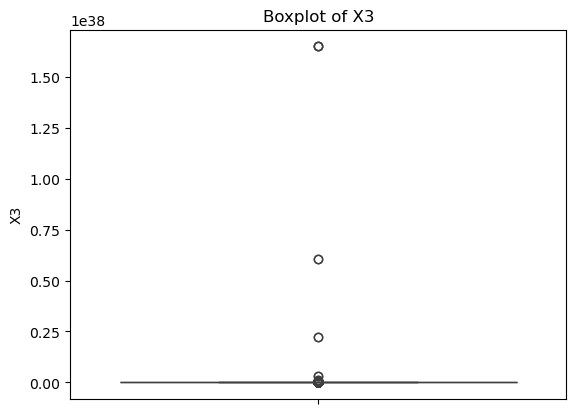

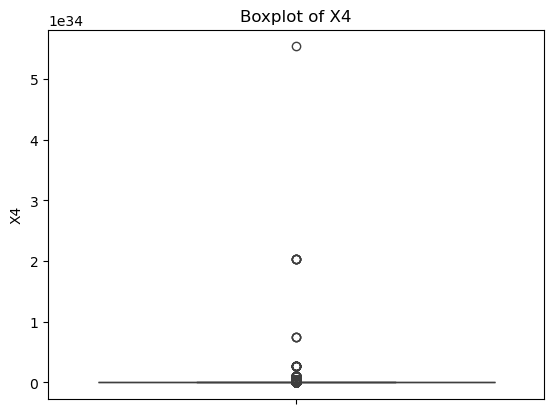

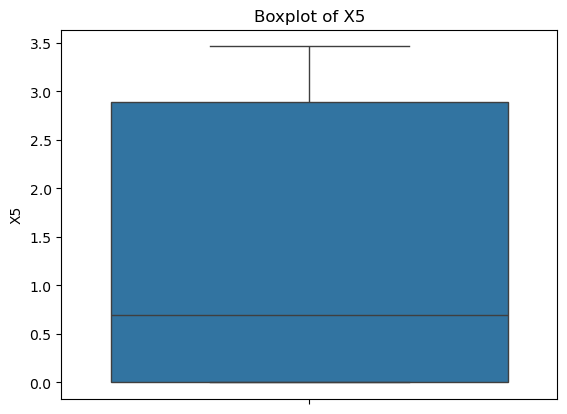

,Date,X1,X2,X3,X4,X5
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372
...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000


In [11]:
#Checking outliers
def demo(x):
    plt.title('Boxplot of '+ x.name)
    sns.boxplot(x)
    plt.show()
    return x

X.apply(demo)

In [12]:
#treating outliers
def outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc = q1 - 1.5 * iqr
    uc = q3 + 1.5 * iqr
    x=x.clip(lower=lc,upper=uc)
    return x

X_out=X.apply(outlier)

In [13]:
X_out.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99])

,Date,X1,X2,X3,X4,X5
count,1639424,1.639424e+06,1.639424e+06,1639424.0,1.639424e+06,1.639424e+06
mean,2022-12-03 07:23:43.817145600,1.134938e+00,5.488299e+00,1.0,1.808049e+00,1.187219e+00
min,2020-12-16 00:00:00,1.000000e+00,5.456417e+00,1.0,1.000000e+00,0.000000e+00
1%,2020-12-30 00:00:00,1.000000e+00,5.456417e+00,1.0,1.000000e+00,0.000000e+00
10%,2021-05-10 00:00:00,1.000000e+00,5.470925e+00,1.0,1.000000e+00,0.000000e+00
25%,2021-12-10 00:00:00,1.049171e+00,5.480597e+00,1.0,1.000000e+00,0.000000e+00
50%,2022-11-30 00:00:00,1.105171e+00,5.488979e+00,1.0,1.000000e+00,6.931472e-01
75%,2023-11-23 00:00:00,1.214096e+00,5.496717e+00,1.0,2.718282e+00,2.890372e+00
99%,2024-11-23 00:00:00,1.461485e+00,5.518537e+00,1.0,5.295705e+00,3.044522e+00
max,2024-12-11 00:00:00,1.461485e+00,5.520897e+00,1.0,5.295705e+00,3.465736e+00


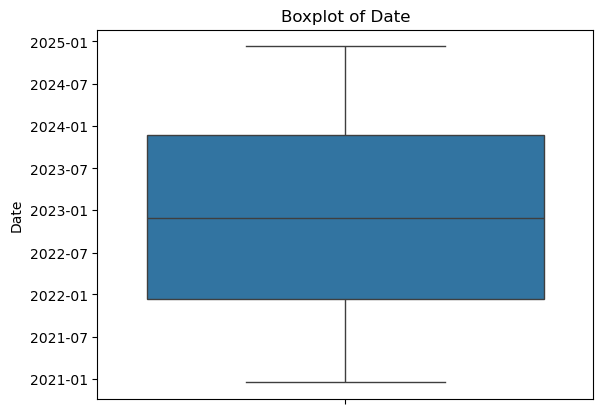

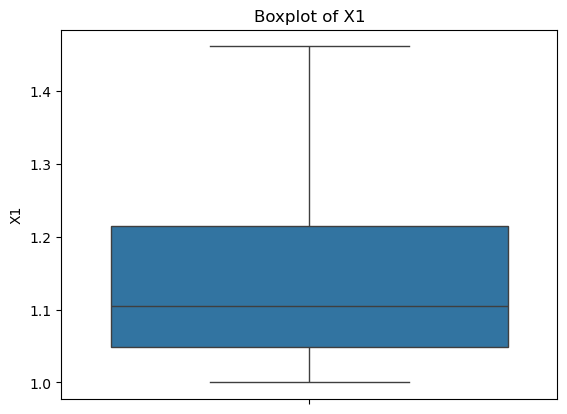

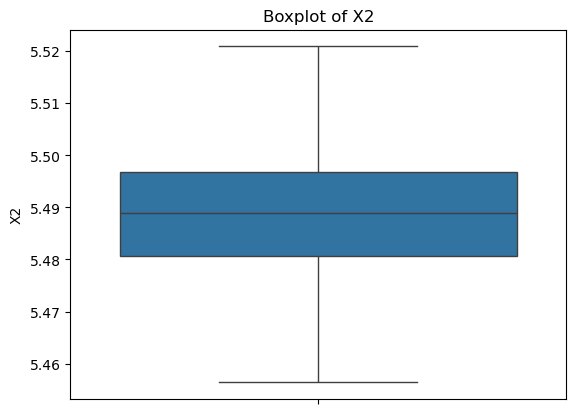

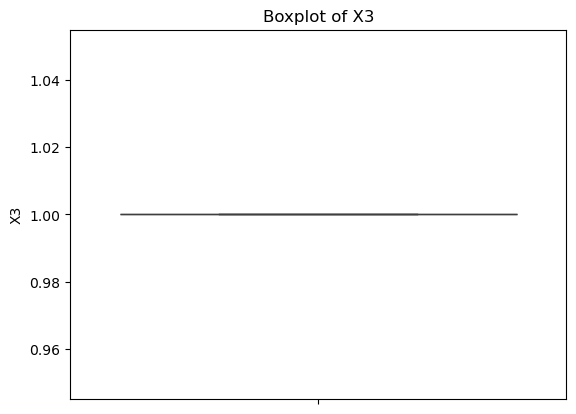

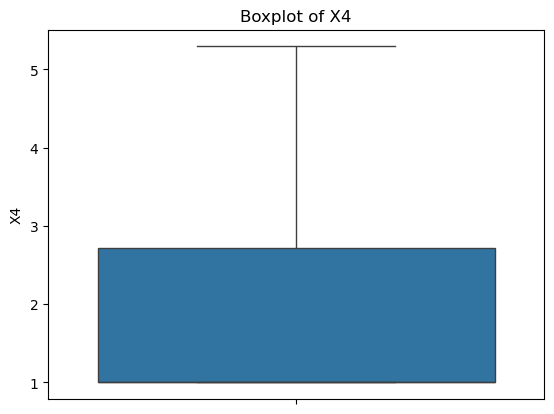

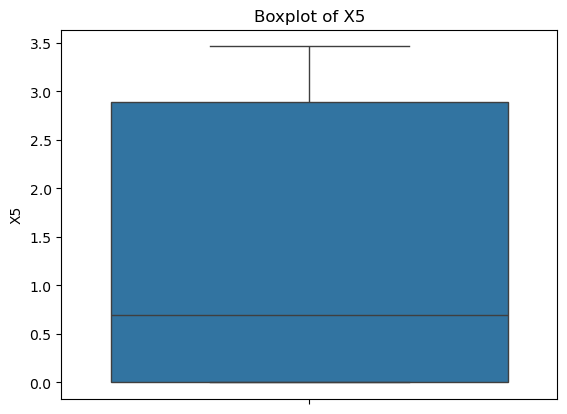

,Date,X1,X2,X3,X4,X5
0,2020-12-16,1.461485,5.463154,1.0,2.718282,2.890372
1,2020-12-16,1.461485,5.458010,1.0,2.718282,2.833213
2,2020-12-16,1.461485,5.456560,1.0,5.295705,2.890372
3,2020-12-16,1.461485,5.458479,1.0,2.718282,2.890372
4,2020-12-16,1.461485,5.466709,1.0,2.718282,2.890372
...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000


In [14]:
X_out.apply(demo)

In [15]:
# balancing the data using SMOTE technique
#!pip install imblearn

In [16]:
from imblearn.over_sampling import SMOTE
# Dropping datetime column
X_out = X_out.drop(columns=['Date'])

# Apply SMOTE only on numerical columns
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_out,y)


In [17]:
#balanced data
print(X_res.shape)
print(y_res.shape)

(3250772, 5)
(3250772,)


#### Data Preprocessing

In [18]:
#Standardizing the features
scaler=StandardScaler()
X_res[X_res.columns]=scaler.fit_transform(X_res)

In [19]:
X_res

,X1,X2,X3,X4,X5
0,1.772288,-0.909800,0.0,-0.002385,0.770867
1,1.772288,-1.234154,0.0,-0.002385,0.727683
2,1.772288,-1.325596,0.0,1.313714,0.770867
3,1.772288,-1.204599,0.0,-0.002385,0.770867
4,1.772288,-0.685606,0.0,-0.002385,0.770867
...,...,...,...,...,...
3250767,0.410601,-0.488483,0.0,-0.879785,0.811715
3250768,-0.887509,-1.294722,0.0,-0.879785,-1.412830
3250769,0.170155,-0.642213,0.0,-0.879785,0.770867
3250770,0.850095,-1.272562,0.0,1.313714,0.811715


In [20]:
X_res.mean()

X1    1.152965e-15
X2    1.690321e-13
X3    0.000000e+00
X4   -1.772394e-16
X5   -4.553388e-16
dtype: float64

In [21]:
X_res.std()

X1    1.0
X2    1.0
X3    0.0
X4    1.0
X5    1.0
dtype: float64

#### Feature Engineering

In [22]:
#rfe= RFE(estimator= RandomForestClassifier(), n_features_to_select=4)
#rfe=rfe.fit(X_res,y_res)
#X_res.columns[rfe.support_]

### Train-test split

In [24]:
X_train, X_val, y_train, y_val=train_test_split(X_res,y_res,test_size=0.3, random_state=37)

### Logistic Regression 

In [29]:
model1= LogisticRegression()
model1= model1.fit(X_train, y_train)

In [34]:
#predictions on train data
y_pred=model1.predict(X_val)

In [35]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [36]:
#accuracy score of train-validation data
accuracy_score(y_val,y_pred)

0.8727697614516341

In [45]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87    487591
           1       0.87      0.88      0.87    487641

    accuracy                           0.87    975232
   macro avg       0.87      0.87      0.87    975232
weighted avg       0.87      0.87      0.87    975232



In [59]:
#predictions on test data
test=test.drop(columns=['Date','ID'])
y_pred_test=model1.predict(test)

In [117]:
test0=pd.read_parquet(r"C:\Users\user\OneDrive\Documents\Python\test.parquet")
test0

,ID,Date,X1,X2,X3,X4,X5
0,0,2020-12-16,1.685395,5.463917,1.0,7.389056,2.890372
1,1,2020-12-16,1.488844,5.454936,1.0,7.389056,2.890372
2,2,2020-12-16,1.164160,5.471136,1.0,1.000000,2.890372
3,3,2020-12-16,1.000000,5.467385,1.0,1.000000,2.890372
4,4,2020-12-16,1.000000,5.453995,1.0,1.000000,2.833213
...,...,...,...,...,...,...,...
409851,409851,2024-11-26,1.120752,5.483053,1.0,2.718282,0.000000
409852,409852,2024-11-26,1.096365,5.477802,1.0,7.389056,0.000000
409853,409853,2024-11-26,1.111822,5.479972,1.0,2.718282,0.000000
409854,409854,2024-11-26,1.000000,5.486165,1.0,1.000000,0.000000


In [43]:
pd.Series(y_predict_test).value_counts()

0    394630
1     15226
Name: count, dtype: int64

In [125]:
t1=pd.DataFrame(y_predict_test)
t1

,0
0,1
1,1
2,1
3,1
4,1
...,...
409851,0
409852,0
409853,0
409854,0


In [131]:
merged_df = test0.join(t1[0])
final_df = merged_df[['ID', 0]]
final_df


,ID,0
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
409851,409851,0
409852,409852,0
409853,409853,0
409854,409854,0


### Decision Tree

In [69]:
Grid={'n_estimators': [100, 150, 200],'max_depth':[2,4,6,8], 'min_samples_split': [100,200,400,500], 'min_samples_leaf': [100,200,400,500]}
grcv= RandomizedSearchCV(RandomForestClassifier(random_state=32), Grid, n_jobs=-1, cv=3)
grcv.fit(X_train, y_train)
grcv.best_params_

KeyboardInterrupt: 

In [53]:
model2= DecisionTreeClassifier(max_depth=8, min_samples_leaf=400, min_samples_split=200, random_state=40)
model2=model2.fit(X_train, y_train)

In [60]:
#predictions on train data
y_predict=model2.predict(X_val)
y_predict

array([1, 0, 1, ..., 1, 1, 0])

In [61]:
#accuracy score of train-validation data
accuracy_score(y_val,y_predict)

0.8911202667672923

In [62]:
print(classification_report(y_val,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89    487591
           1       0.88      0.91      0.89    487641

    accuracy                           0.89    975232
   macro avg       0.89      0.89      0.89    975232
weighted avg       0.89      0.89      0.89    975232



In [133]:
#predictions on test data
y_predict_test=model2.predict(test)
t2=pd.DataFrame(y_predict_test)

In [134]:
merged_df = test0.join(t2[0])
final_df = merged_df[['ID', 0]]
final_df

,ID,0
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
409851,409851,0
409852,409852,0
409853,409853,0
409854,409854,0


### RandomForest

In [64]:
#best_params=grcv.best_params_

In [80]:
model3=RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=400, min_samples_split=200, random_state=30)
model3=model3.fit(X_train, y_train)

In [81]:
#predictions on train data
y_pred0 = model3.predict(X_val)
y_pred0

array([1, 0, 1, ..., 1, 1, 0])

In [82]:
#accuracy score of train-validation data
accuracy_score(y_val, y_pred0)

0.8919323812180077

In [83]:
##classification report of train-validation data
print(classification_report(y_val,y_pred0))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89    487591
           1       0.88      0.91      0.89    487641

    accuracy                           0.89    975232
   macro avg       0.89      0.89      0.89    975232
weighted avg       0.89      0.89      0.89    975232



In [135]:
#predictions on test data
y_predict0_test=model3.predict(test)
t3=pd.DataFrame(y_predict0_test)

In [136]:
merged_df = test0.join(t3[0])
final_df = merged_df[['ID', 0]]
final_df

,ID,0
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
409851,409851,0
409852,409852,0
409853,409853,0
409854,409854,0


### XGBoost

In [97]:
param = {
    'max_depth': range(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': range(50, 300, 50),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]}
random_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False), param_distributions=param, n_iter=20, scoring='accuracy', cv=3, verbose=0)
random_search.fit(X_train, y_train)

best_param= random_search.best_params_


D:\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:13:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:13:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Python\Lib\site-packages\xgbo

KeyboardInterrupt: 

In [ ]:
model6= XGBClassifier(use_label_encoder=False, )
model6= model6.fit(X_train,y_train)

In [ ]:
#predictions on train data
xg_pred = model6.predict(X_val)
xg_pred

In [ ]:
#accuracy score of train-validation data
accuracy_score(y_val, xg_pred)

In [ ]:
##classification report of train-validation data
print(classification_report(y_val,xg_pred))

In [ ]:
#predictions on test data
y_predict1_test=model6.predict(test)
t4=pd.DataFrame(y_predict1_test)

### LightGBM

In [72]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.6 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 1.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.5 MB 1.8 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.5 MB 1.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 2.0 MB/s eta 0:00:01
   -----------------------

In [73]:
import lightgbm as lgb

In [74]:
model4 = lgb.LGBMClassifier()
model4=model4.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1137745, number of negative: 1137795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 2275540, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


In [75]:
#predictions on train data
y_pred1 = model4.predict(X_val)
y_pred1

array([1, 0, 1, ..., 1, 1, 0])

In [76]:
#accuracy score of train-validation data
accuracy_score(y_val, y_pred1)

0.9022283928337053

In [78]:
##classification report of train-validation data
print(classification_report(y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90    487591
           1       0.89      0.92      0.90    487641

    accuracy                           0.90    975232
   macro avg       0.90      0.90      0.90    975232
weighted avg       0.90      0.90      0.90    975232



In [137]:
#predictions on test data
y_predict1_test=model4.predict(test)
t5=pd.DataFrame(y_predict1_test)

In [138]:
merged_df = test0.join(t5[0])
final_df = merged_df[['ID', 0]]
final_df

,ID,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
409851,409851,0
409852,409852,0
409853,409853,0
409854,409854,0


### CatBoost

In [85]:
pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 660.6 kB/s eta 0:02:34
   ---------------------------------------- 0.1/101.7 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 0.3/101.7 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.3/101.7 MB 2.2 MB/s eta 0:00:47
   ---------------------------------------- 0.4/101.7 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.5/101.7 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 0.6/101.7 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 0.7/101.7 MB 1.9 MB/s eta 0:00:54
   ---------------------------------------- 0.8/101.7 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.8/101.7 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 1.0/101.7 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 1.1/101.7 MB 2.0 MB/s eta

In [86]:
from catboost import CatBoostClassifier

In [87]:
model5 = CatBoostClassifier(iterations=100)
model5= model5.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4473605	total: 410ms	remaining: 40.6s
1:	learn: 0.3593500	total: 678ms	remaining: 33.2s
2:	learn: 0.3179239	total: 949ms	remaining: 30.7s
3:	learn: 0.2972663	total: 1.23s	remaining: 29.4s
4:	learn: 0.2860657	total: 1.49s	remaining: 28.3s
5:	learn: 0.2796711	total: 1.77s	remaining: 27.8s
6:	learn: 0.2767067	total: 2.06s	remaining: 27.3s
7:	learn: 0.2746815	total: 2.41s	remaining: 27.8s
8:	learn: 0.2731227	total: 2.73s	remaining: 27.6s
9:	learn: 0.2717210	total: 3.05s	remaining: 27.5s
10:	learn: 0.2706007	total: 3.38s	remaining: 27.3s
11:	learn: 0.2689172	total: 3.71s	remaining: 27.2s
12:	learn: 0.2683190	total: 4.03s	remaining: 27s
13:	learn: 0.2669967	total: 4.33s	remaining: 26.6s
14:	learn: 0.2662642	total: 4.59s	remaining: 26s
15:	learn: 0.2655687	total: 4.88s	remaining: 25.6s
16:	learn: 0.2648578	total: 5.18s	remaining: 25.3s
17:	learn: 0.2639417	total: 5.53s	remaining: 25.2s
18:	learn: 0.2634352	total: 5.86s	remaining: 25s
19:	learn: 0.2616500	t

In [89]:
#predictions on train data
cat_pred = model5.predict(X_val)

In [90]:
#accuracy score of train-validation data
accuracy_score(y_val, cat_pred)

0.9117789408058801

In [91]:
##classification report of train-validation data
print(classification_report(y_val,cat_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91    487591
           1       0.89      0.93      0.91    487641

    accuracy                           0.91    975232
   macro avg       0.91      0.91      0.91    975232
weighted avg       0.91      0.91      0.91    975232



In [139]:
#predictions on test data
y_predict2_test=model5.predict(test)
t6=pd.DataFrame(y_predict2_test)

In [140]:
merged_df = test0.join(t6[0])
final_df = merged_df[['ID', 0]]
final_df

,ID,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
409851,409851,0
409852,409852,0
409853,409853,0
409854,409854,0


### KNN

In [102]:
X_small = X_train.sample(50000, random_state=42)
y_small = y_train.loc[X_small.index]

In [103]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_small, y_small)

KNeighborsClassifier(n_neighbors=25)

In [104]:
#predictions on train data
y_pred_knn = knn.predict(X_val)

In [105]:
#accuracy score of train-validation data
accuracy_score(y_val, y_pred_knn)

0.8909685080063

In [106]:
##classification report of train-validation data
print(classification_report(y_val,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89    487591
           1       0.87      0.92      0.89    487641

    accuracy                           0.89    975232
   macro avg       0.89      0.89      0.89    975232
weighted avg       0.89      0.89      0.89    975232



In [141]:
#predictions on test data
y_pred_knn_test=knn.predict(test)
t7=pd.DataFrame(y_pred_knn_test)

In [142]:
merged_df = test0.join(t7[0])
final_df = merged_df[['ID', 0]]
final_df

,ID,0
0,0,1
1,1,1
2,2,0
3,3,1
4,4,1
...,...,...
409851,409851,0
409852,409852,0
409853,409853,0
409854,409854,0


### SVM

In [108]:
from sklearn.svm import SVC

In [111]:
X_small = X_train.sample(25000, random_state=42)
y_small = y_train.loc[X_small.index]

In [113]:
svm_model = SVC(kernel='sigmoid')
svm_model= svm_model.fit(X_small, y_small)


In [118]:
svm_pred = svm_model.predict(X_val)

KeyboardInterrupt: 

In [ ]:
accuracy_score(y_val, svm_pred)

### Final Model Selection

All models gave good accuracy, but best accuracy was given by CatBoost model as its f1 score was highest.